<a href="https://colab.research.google.com/github/CodewSanthosh/SDC-GenAI/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5385 - loss: 0.6821 - val_accuracy: 0.6286 - val_loss: 0.6246
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6558 - loss: 0.5960 - val_accuracy: 0.7143 - val_loss: 0.5692
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7158 - loss: 0.5482 - val_accuracy: 0.8000 - val_loss: 0.5264
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7049 - loss: 0.5291 - val_accuracy: 0.8000 - val_loss: 0.4954
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7484 - loss: 0.4817 - val_accuracy: 0.8143 - val_loss: 0.4705
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7813 - loss: 0.4530 - val_accuracy: 0.8143 - val_loss: 0.4491
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8185 - loss: 0.4051 - val_accuracy: 0.8286 - val_loss: 0.4300
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7831 - loss: 0.4294 - val_accuracy: 0.8286 - val_loss: 0.4133


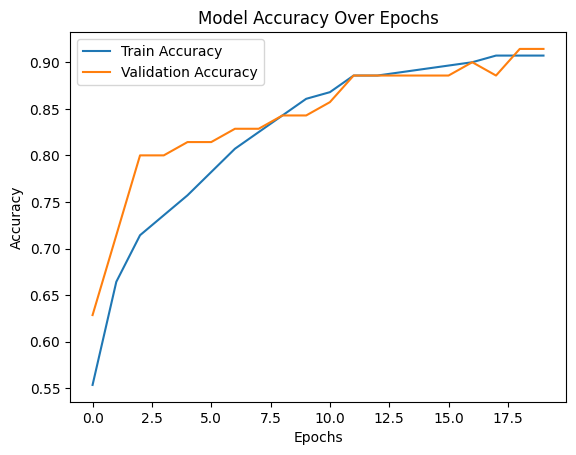

In [1]:
# ANN (Artificial Neural Network) - Google Colab Friendly

# Step 1: Install & Import Libraries
!pip install -q tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Generate Sample Data
X, y = make_classification(n_samples=500, n_features=10, n_classes=2,
                           n_informative=6, random_state=42)

# Step 3: Train/Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Build ANN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Step 5: Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 7: Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Step 8: Classification Report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
